In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [14]:
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=23)


In [4]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


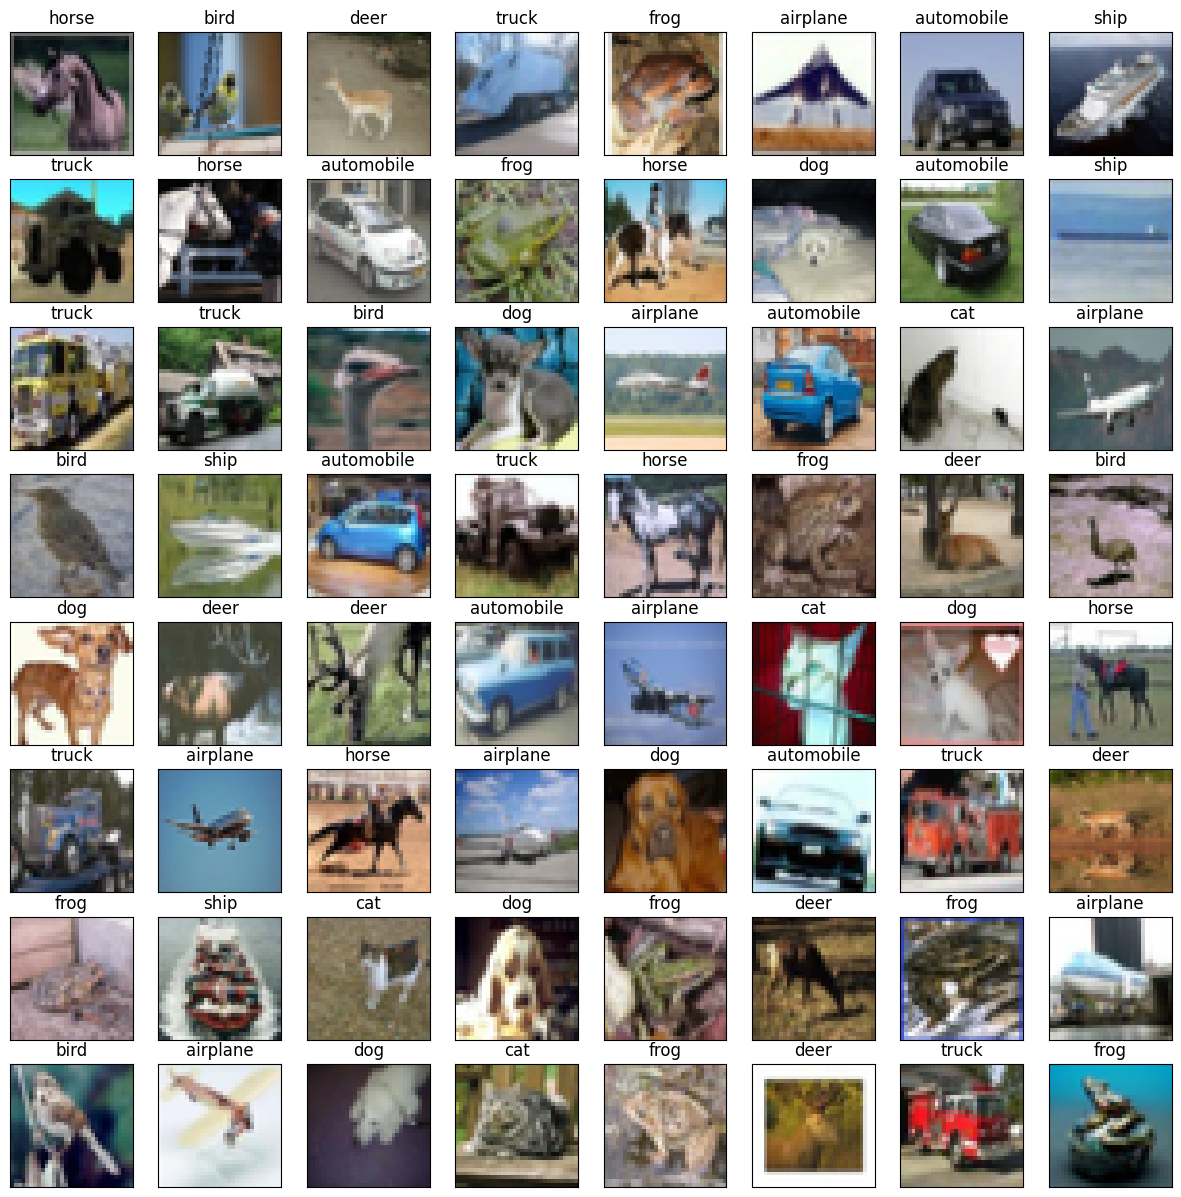

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(15,15))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

In [6]:
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

In [7]:
model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 3
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Block 4
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Flatten the tensor
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,186,346 (4.53 MB)

 Trainable params: 1,184,426 (4.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [9]:
batch_size = 64
epochs = 100

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

model.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          callbacks=[early_stopping, reduce_lr],
          verbose=2)

Epoch 1/100
704/704 - 33s - 47ms/step - accuracy: 0.3796 - loss: 2.0935 - val_accuracy: 0.3858 - val_loss: 1.7511 - learning_rate: 5.0000e-04
Epoch 2/100
704/704 - 21s - 30ms/step - accuracy: 0.5317 - loss: 1.4684 - val_accuracy: 0.5402 - val_loss: 1.3260 - learning_rate: 5.0000e-04
Epoch 3/100
704/704 - 10s - 14ms/step - accuracy: 0.6137 - loss: 1.1970 - val_accuracy: 0.6594 - val_loss: 1.0065 - learning_rate: 5.0000e-04
Epoch 4/100
704/704 - 8s - 11ms/step - accuracy: 0.6743 - loss: 0.9696 - val_accuracy: 0.6912 - val_loss: 0.9346 - learning_rate: 5.0000e-04
Epoch 5/100
704/704 - 8s - 11ms/step - accuracy: 0.7178 - loss: 0.8285 - val_accuracy: 0.7266 - val_loss: 0.7546 - learning_rate: 5.0000e-04
Epoch 6/100
704/704 - 7s - 10ms/step - accuracy: 0.7474 - loss: 0.7398 - val_accuracy: 0.7488 - val_loss: 0.7191 - learning_rate: 5.0000e-04
Epoch 7/100
704/704 - 10s - 15ms/step - accuracy: 0.7674 - loss: 0.6727 - val_accuracy: 0.7900 - val_loss: 0.6290 - learning_rate: 5.0000e-04
Epoch 8/1

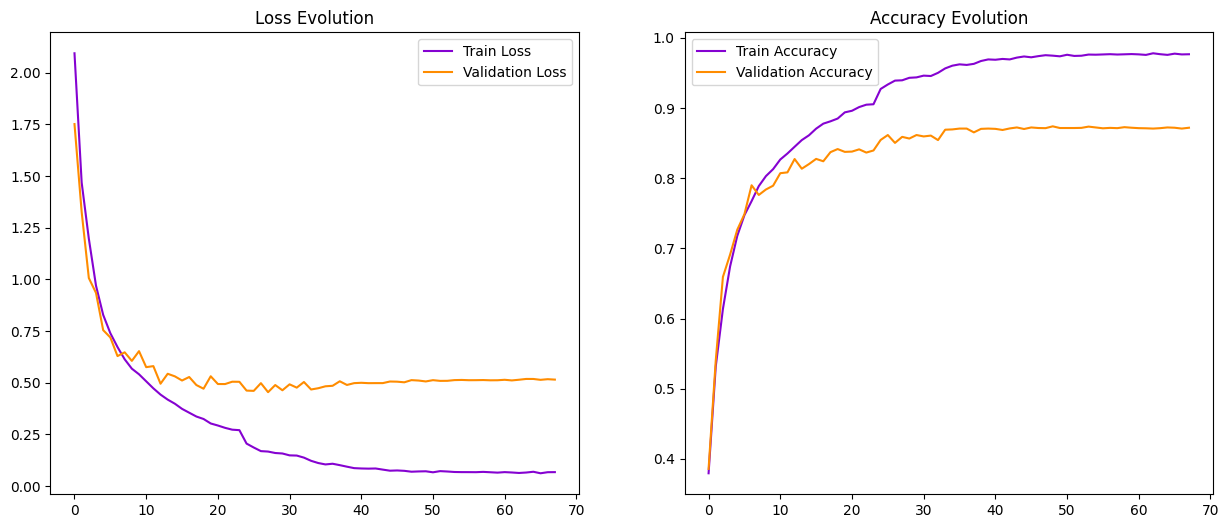

In [10]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [16]:
l1_lambda = 0.0001
model_dataaugmentation = Sequential()

# Block 1
model_dataaugmentation.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=l1(l1_lambda), input_shape=X_train.shape[1:]))
model_dataaugmentation.add(BatchNormalization())
model_dataaugmentation.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=l1(l1_lambda)))
model_dataaugmentation.add(BatchNormalization())
model_dataaugmentation.add(MaxPooling2D(pool_size=(2, 2)))
model_dataaugmentation.add(Dropout(0.2))

# Block 2
model_dataaugmentation.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=l1(l1_lambda)))
model_dataaugmentation.add(BatchNormalization())
model_dataaugmentation.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=l1(l1_lambda)))
model_dataaugmentation.add(BatchNormalization())
model_dataaugmentation.add(MaxPooling2D(pool_size=(2, 2)))
model_dataaugmentation.add(Dropout(0.3))

# Block 3
model_dataaugmentation.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=l1(l1_lambda)))
model_dataaugmentation.add(BatchNormalization())
model_dataaugmentation.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=l1(l1_lambda)))
model_dataaugmentation.add(BatchNormalization())
model_dataaugmentation.add(MaxPooling2D(pool_size=(2, 2)))
model_dataaugmentation.add(Dropout(0.4))

# Block 4
model_dataaugmentation.add(Conv2D(256, (3,3), padding='same', activation='relu', kernel_regularizer=l1(l1_lambda)))
model_dataaugmentation.add(BatchNormalization())
model_dataaugmentation.add(Conv2D(256, (3,3), padding='same', activation='relu', kernel_regularizer=l1(l1_lambda)))
model_dataaugmentation.add(BatchNormalization())
model_dataaugmentation.add(MaxPooling2D(pool_size=(2, 2)))
model_dataaugmentation.add(Dropout(0.5))

# Flatten the tensor
model_dataaugmentation.add(Flatten())
model_dataaugmentation.add(Dense(10, activation='softmax'))

In [12]:
data_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

In [17]:
batch_size = 64
epochs = 100

optimizer = Adam(learning_rate=0.0005)
model_dataaugmentation.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

model_dataaugmentation.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          callbacks=[early_stopping, reduce_lr],
          verbose=2)

Epoch 1/100
704/704 - 38s - 54ms/step - accuracy: 0.3782 - loss: 4.6128 - val_accuracy: 0.4018 - val_loss: 4.0416 - learning_rate: 5.0000e-04
Epoch 2/100
704/704 - 16s - 23ms/step - accuracy: 0.5369 - loss: 3.6744 - val_accuracy: 0.5994 - val_loss: 3.1938 - learning_rate: 5.0000e-04
Epoch 3/100
704/704 - 10s - 15ms/step - accuracy: 0.6172 - loss: 3.0388 - val_accuracy: 0.6246 - val_loss: 2.9233 - learning_rate: 5.0000e-04
Epoch 4/100
704/704 - 10s - 15ms/step - accuracy: 0.6783 - loss: 2.5198 - val_accuracy: 0.6860 - val_loss: 2.3151 - learning_rate: 5.0000e-04
Epoch 5/100
704/704 - 8s - 11ms/step - accuracy: 0.7094 - loss: 2.2108 - val_accuracy: 0.7342 - val_loss: 2.0582 - learning_rate: 5.0000e-04
Epoch 6/100
704/704 - 8s - 11ms/step - accuracy: 0.7295 - loss: 2.0300 - val_accuracy: 0.7296 - val_loss: 1.9690 - learning_rate: 5.0000e-04
Epoch 7/100
704/704 - 10s - 14ms/step - accuracy: 0.7473 - loss: 1.8794 - val_accuracy: 0.7670 - val_loss: 1.7764 - learning_rate: 5.0000e-04
Epoch 8/

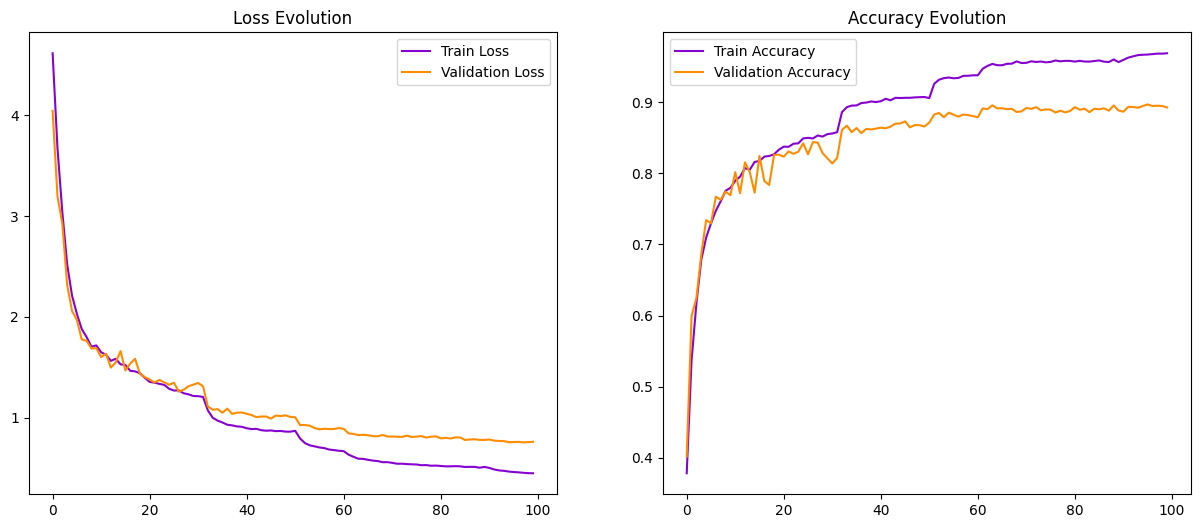

In [18]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model_dataaugmentation.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model_dataaugmentation.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_dataaugmentation.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model_dataaugmentation.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

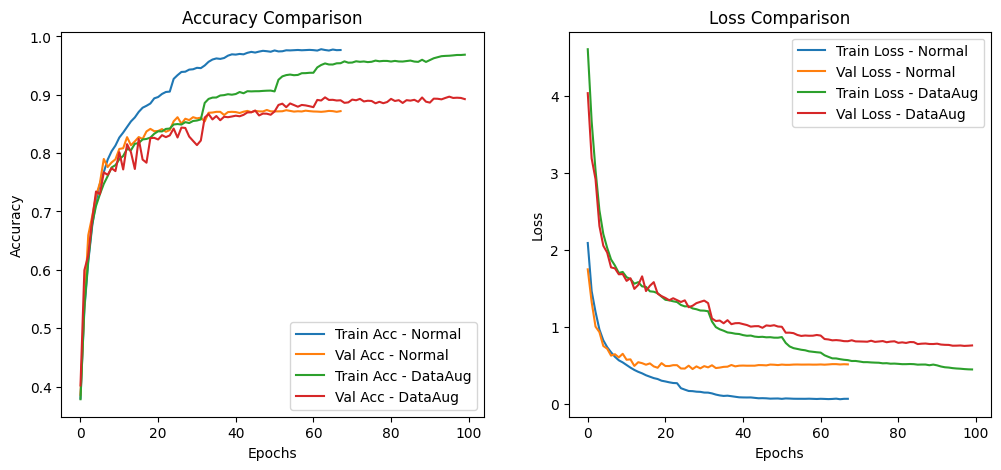

In [21]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(model.history.history['accuracy'], label='Train Acc - Normal')
plt.plot(model.history.history['val_accuracy'], label='Val Acc - Normal')
plt.plot(model_dataaugmentation.history.history['accuracy'], label='Train Acc - DataAug')
plt.plot(model_dataaugmentation.history.history['val_accuracy'], label='Val Acc - DataAug')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(model.history.history['loss'], label='Train Loss - Normal')
plt.plot(model.history.history['val_loss'], label='Val Loss - Normal')
plt.plot(model_dataaugmentation.history.history['loss'], label='Train Loss - DataAug')
plt.plot(model_dataaugmentation.history.history['val_loss'], label='Val Loss - DataAug')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
# Evaluate Model without Data Augmentation
test_loss_model, test_acc_model = model.evaluate(X_test, y_test, verbose=0)
print(f"Model (No Augmentation) - Test Accuracy: {test_acc_model*100:.2f}%, Test Loss: {test_loss_model:.4f}")

# Evaluate Model with Data Augmentation
test_loss_aug, test_acc_aug = model_dataaugmentation.evaluate(X_test, y_test, verbose=0)
print(f"Model (With Data Augmentation) - Test Accuracy: {test_acc_aug*100:.2f}%, Test Loss: {test_loss_aug:.4f}")

print("\nAccuracy Improvement:", (test_acc_aug - test_acc_model) * 100, "%")

Model (No Augmentation) - Test Accuracy: 86.53%, Test Loss: 0.4623
Model (With Data Augmentation) - Test Accuracy: 88.36%, Test Loss: 0.8188

Accuracy Improvement: 1.8299996852874756 %


In [ ]:
# Saving Both the models
model.save("model.keras")
model_dataaugmentation.save("model_dataaugmentation.keras")